<a href="https://colab.research.google.com/github/parthsongaonkar/customer-shopping-behaviour-eda/blob/main/Shopping_behaviour_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



#Upload file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data exploration

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project data/data_shopping_behavior_updated - shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Date,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,01/01/2024,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,16/11/2024,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,17/11/2024,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,20/03/2023,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,17/06/2023,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Date                    3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Size                    3900 non-null   object 
 9   Color                   3900 non-null   object 
 10  Season                  3900 non-null   object 
 11  Review Rating           3900 non-null   float64
 12  Subscription Status     3900 non-null   object 
 13  Shipping Type           3900 non-null   object 
 14  Discount Applied        3900 non-null   

#Data cleaning

In [ ]:
df.isnull().sum()
# this gives the total numbr of null values in each column

,0
Customer ID,0
Age,0
Gender,0
Date,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0


#EDA

In [ ]:
df.groupby('Season')['Purchase Amount (USD)'].sum()

,Purchase Amount (USD)
Season,
Fall,60018
Spring,58679
Summer,55777
Winter,58607


In [ ]:
df['Category'].nunique()

4

In [ ]:
df.groupby(['Frequency of Purchases', 'Category']).size()


Frequency of Purchases  Category   
Annually                Accessories    184
                        Clothing       258
                        Footwear        87
                        Outerwear       43
Bi-Weekly               Accessories    180
                        Clothing       247
                        Footwear        80
                        Outerwear       40
Every 3 Months          Accessories    180
                        Clothing       265
                        Footwear        92
                        Outerwear       47
Fortnightly             Accessories    170
                        Clothing       223
                        Footwear        96
                        Outerwear       53
Monthly                 Accessories    171
                        Clothing       263
                        Footwear        75
                        Outerwear       44
Quarterly               Accessories    189
                        Clothing       239
                        Footwear        83
                        Outerwear       52
Weekly                  Accessories    166
                        Clothing       242
                        Footwear        86
                        Outerwear       45
dtype: int64

In [ ]:
df.groupby('Category')['Review Rating'].mean()


,Review Rating
Category,
Accessories,3.768629
Clothing,3.723143
Footwear,3.790651
Outerwear,3.746914


In [ ]:
df.groupby('Item Purchased')['Size'].agg(lambda x: x.value_counts().idxmax())


,Size
Item Purchased,
Backpack,M
Belt,M
Blouse,M
Boots,M
Coat,M
Dress,M
Gloves,M
Handbag,M
Hat,M


In [ ]:
df['Subscription Status'].value_counts()


,count
Subscription Status,
No,2847
Yes,1053


In [ ]:
df.groupby(['Subscription Status', 'Shipping Type']).size().reset_index(name='count')


,Subscription Status,Shipping Type,count
0,No,2-Day Shipping,474
1,No,Express,456
2,No,Free Shipping,498
3,No,Next Day Air,480
4,No,Standard,479
5,No,Store Pickup,460
6,Yes,2-Day Shipping,153
7,Yes,Express,190
8,Yes,Free Shipping,177
9,Yes,Next Day Air,168


In [ ]:
min_age=df['Age'].min()
max_age=df['Age'].max()
bins = list(range(int(min_age // 10) * 10, max_age + 11, 10))
labels = [f'{i}-{i+10}' for i in bins[:-1]]
df['Age Group'] = pd.cut(
    df['Age'],
    bins=bins,
    labels=labels,
    right=False, #right value is not included only left is included
    include_lowest=True # Ensures the minimum value is included in the first bin
)


#head for unsorted age group
print(df[['Age', 'Age Group']].head())


   Age Age Group
0   55     50-60
1   19     10-20
2   50     50-60
3   21     20-30
4   45     40-50


In [ ]:
# all age group sorted
print(df['Age Group'].value_counts().sort_index())

Age Group
10-20    150
20-30    728
30-40    724
40-50    739
50-60    771
60-70    721
70-80     67
Name: count, dtype: int64


**Summary of 'who is buying'?**

##Spending trend


###1.1 Purchase amount by age gorup

In [ ]:
# Total purchase amount per age group
purchase_by_age_group = df.groupby('Age Group', observed=True)['Purchase Amount (USD)'].sum().reset_index()

#sort
purchase_by_age_group = purchase_by_age_group.sort_index()

print(purchase_by_age_group)


  Age Group  Purchase Amount (USD)
0     10-20                   9080
1     20-30                  43825
2     30-40                  43541
3     40-50                  43225
4     50-60                  46516
5     60-70                  43084
6     70-80                   3810


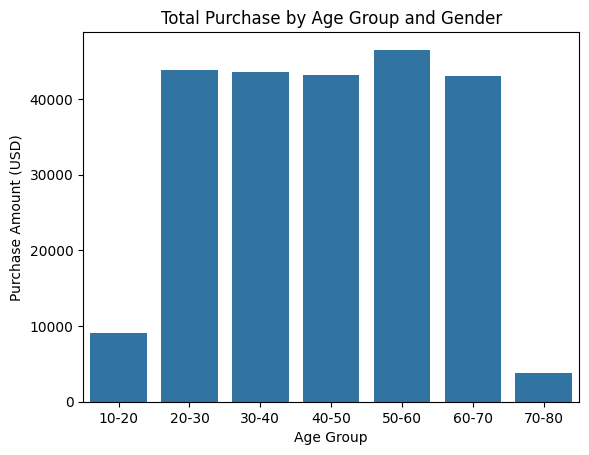

In [ ]:
sns.barplot(data=purchase_by_age_group, x='Age Group', y='Purchase Amount (USD)')
plt.title('Total Purchase by Age Group and Gender')
plt.show()

###1.2 Purchase amount by age group then gender

In [ ]:
purchase_by_age_gender = df.groupby(['Age Group', 'Gender'], observed=True)['Purchase Amount (USD)'].sum().reset_index()

#sort
purchase_by_age_gender = purchase_by_age_gender.sort_values(['Age Group', 'Gender'])

print(purchase_by_age_gender)


   Age Group  Gender  Purchase Amount (USD)
0      10-20  Female                   2869
1      10-20    Male                   6211
2      20-30  Female                  14132
3      20-30    Male                  29693
4      30-40  Female                  13996
5      30-40    Male                  29545
6      40-50  Female                  14527
7      40-50    Male                  28698
8      50-60  Female                  14563
9      50-60    Male                  31953
10     60-70  Female                  13795
11     60-70    Male                  29289
12     70-80  Female                   1309
13     70-80    Male                   2501


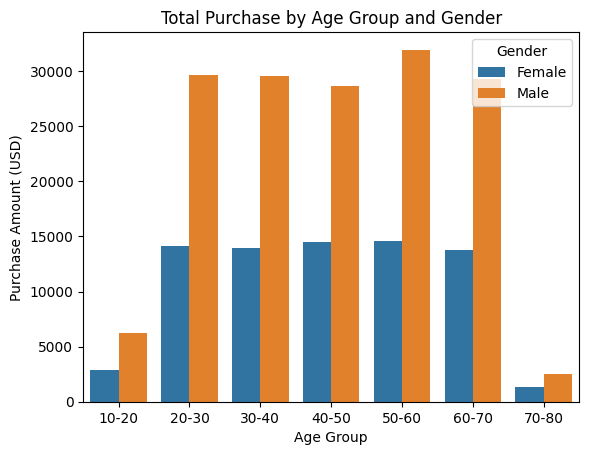

In [ ]:
sns.barplot(data=purchase_by_age_gender, x='Age Group', y='Purchase Amount (USD)', hue='Gender')
plt.title('Total Purchase by Age Group and Gender')
plt.show()

##Sales

In [ ]:
AvgSaleRegion = (
    df.groupby('Location', observed=True)['Purchase Amount (USD)']
      .mean()
      .reset_index()
)

print(AvgSaleRegion.sort_values('Purchase Amount (USD)', ascending=False))


          Location  Purchase Amount (USD)
1           Alaska              67.597222
37    Pennsylvania              66.567568
2          Arizona              66.553846
47   West Virginia              63.876543
27          Nevada              63.379310
46      Washington              63.328767
33    North Dakota              62.891566
45        Virginia              62.883117
43            Utah              62.577465
21        Michigan              62.095890
41       Tennessee              61.974026
30      New Mexico              61.901235
38    Rhode Island              61.444444
42           Texas              61.194805
3         Arkansas              61.113924
12        Illinois              61.054348
23     Mississippi              61.037500
20   Massachusetts              60.888889
14            Iowa              60.884058
32  North Carolina              60.794872
49         Wyoming              60.690141
40    South Dakota              60.514286
31        New York              60

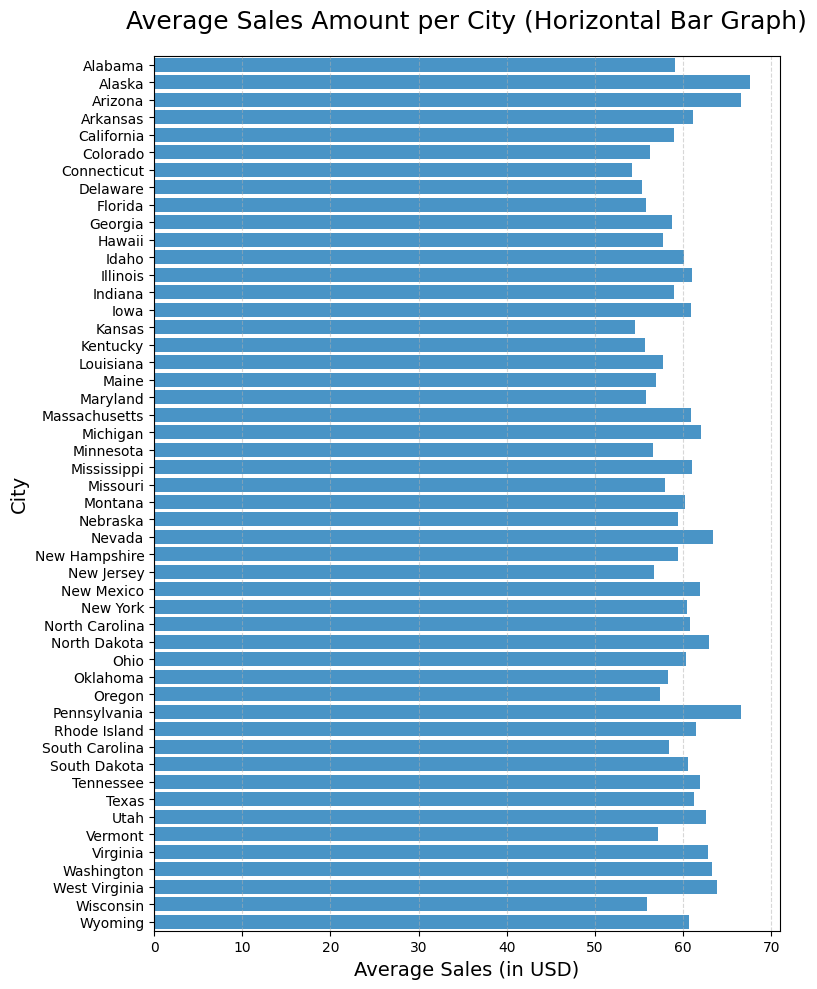

In [ ]:
plt.figure(figsize=(8, 10))

sns.barplot(
    x='Purchase Amount (USD)',
    y='Location',
    data=AvgSaleRegion,
    # The 'color' argument works differently in barplot; using a single color for uniformity:
    color="#3498db"
)


plt.ticklabel_format(style='plain', axis='x', useOffset=False)


def format_numbers_with_commas(x, pos):
    return f'{x:,.0f}'
formatter = FuncFormatter(format_numbers_with_commas)
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Average Sales Amount per City (Horizontal Bar Graph)', fontsize=18, pad=20)
plt.xlabel('Average Sales (in USD)', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

##Customer segmentation

In [ ]:
import numpy as np

df['Customer Segment'] = np.select(
    [
        df['Previous Purchases'] == 0,
        df['Previous Purchases'].between(1, 5),
        df['Previous Purchases'].between(6, 10),
        (df['Previous Purchases'] > 10) & (df['Subscription Status'] == 'Yes'),
        df['Previous Purchases'] > 10
    ],
    [
        'New Customers',
        'Occasional Buyers',
        'Frequent Buyers',
        'Loyal Subscribers',
        'Loyal Customers'
    ],
    default='Other'
)


In [ ]:
segment_analysis = (
    df.groupby('Customer Segment')
      .agg(
          Avg_Spending=('Purchase Amount (USD)', 'mean'),
          Avg_Review_Rating=('Review Rating', 'mean'),
          Customer_Count=('Customer ID', 'nunique')
      )
      .reset_index()
)

segment_analysis


,Customer Segment,Avg_Spending,Avg_Review_Rating,Customer_Count
0,Frequent Buyers,60.755556,3.765278,360
1,Loyal Customers,59.597686,3.742590,2247
2,Loyal Subscribers,59.379747,3.744304,869
3,Occasional Buyers,60.594340,3.787500,424


##Discount for subscribers vs non subscribers

In [ ]:
df['Discount'] = df['Discount Applied'].map({'Yes': 1, 'No': 0})
subscription_analysis = (
    df.groupby('Subscription Status')
      .agg(
          Avg_Purchase_Amount=('Purchase Amount (USD)', 'mean'),
          Discount_Usage_Rate=('Discount', 'mean'),
          Avg_Review_Rating=('Review Rating', 'mean'),
          Total_Customers=('Customer ID', 'nunique')
      )
      .reset_index()
)

subscription_analysis


,Subscription Status,Avg_Purchase_Amount,Discount_Usage_Rate,Avg_Review_Rating,Total_Customers
0,No,59.865121,0.219178,3.752722,2847
1,Yes,59.491928,1.000000,3.742450,1053


**Summary of 'what is brought'?**

In [ ]:
top_categories = df['Category'].value_counts().head(3).index.tolist()
df_top = df[df['Category'].isin(top_categories)]

combination_counts = df_top.groupby(
    ['Season', 'Category', 'Size', 'Color']
)['Item Purchased'].count().reset_index(name='Combination Count')

def get_top_combinations(group):

    return group.sort_values(by='Combination Count', ascending=False).head(1)

popular_combinations_by_season = combination_counts.groupby(
    ['Season', 'Category'],
    group_keys=False
).apply(get_top_combinations).reset_index(drop=True)

print(popular_combinations_by_season)

    Season     Category Size     Color  Combination Count
0     Fall  Accessories    M   Magenta                 12
1     Fall     Clothing    M    Orange                 15
2     Fall     Footwear    M    Violet                  7
3   Spring  Accessories    M     Olive                  9
4   Spring     Clothing    M    Violet                 15
5   Spring     Footwear    L      Pink                  6
6   Summer  Accessories    M      Blue                  9
7   Summer     Clothing    M    Silver                 16
8   Summer     Footwear    M  Lavender                  6
9   Winter  Accessories    M     Olive                 12
10  Winter     Clothing    M    Violet                 15
11  Winter     Footwear    L     Brown                  6


/tmp/ipython-input-1676265349.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(get_top_combinations).reset_index(drop=True)


##Interpreting the rating

In [ ]:
category_ratings = (
    df.groupby('Category')
      .agg(
          Avg_Review_Rating=('Review Rating', 'mean'),
          Review_Count=('Review Rating', 'count')
      )
      .reset_index()
)
print(category_ratings)

      Category  Avg_Review_Rating  Review_Count
0  Accessories           3.768629          1240
1     Clothing           3.723143          1737
2     Footwear           3.790651           599
3    Outerwear           3.746914           324


In [ ]:
overall_avg_rating = df['Review Rating'].mean()
print(overall_avg_rating)

3.7499487179487176


In [ ]:
df['High_Rating'] = df['Review Rating'] >= 4
df['Low_Rating'] = df['Review Rating'] <= 3

category_rating_distribution = (
    df.groupby('Category')
      .agg(
          High_Rating_Count=('High_Rating', 'sum'),
          Low_Rating_Count=('Low_Rating', 'sum'),
          Total_Reviews=('Review Rating', 'count'),
          Avg_Rating=('Review Rating', 'mean')
      )
      .reset_index()
)

category_rating_distribution['High_Rating_%'] = (
    category_rating_distribution['High_Rating_Count'] /
    category_rating_distribution['Total_Reviews'] * 100
)

category_rating_distribution['Low_Rating_%'] = (
    category_rating_distribution['Low_Rating_Count'] /
    category_rating_distribution['Total_Reviews'] * 100
)

category_rating_distribution


,Category,High_Rating_Count,Low_Rating_Count,Total_Reviews,Avg_Rating,High_Rating_%,Low_Rating_%
0,Accessories,535,255,1240,3.768629,43.145161,20.564516
1,Clothing,698,400,1737,3.723143,40.184226,23.028210
2,Footwear,270,123,599,3.790651,45.075125,20.534224
3,Outerwear,141,69,324,3.746914,43.518519,21.296296


In [ ]:
df[df['Low_Rating']].groupby('Shipping Type').size().sort_values(ascending=False)


,0
Shipping Type,
Store Pickup,167
Next Day Air,151
Free Shipping,143
Express,133
Standard,128
2-Day Shipping,125


In [ ]:
df[df['Low_Rating']].groupby('Size').size()


,0
Size,
L,232
M,395
S,133
XL,87


In [ ]:
df[df['Low_Rating']].groupby('Discount Applied').size()


,0
Discount Applied,
No,473
Yes,374


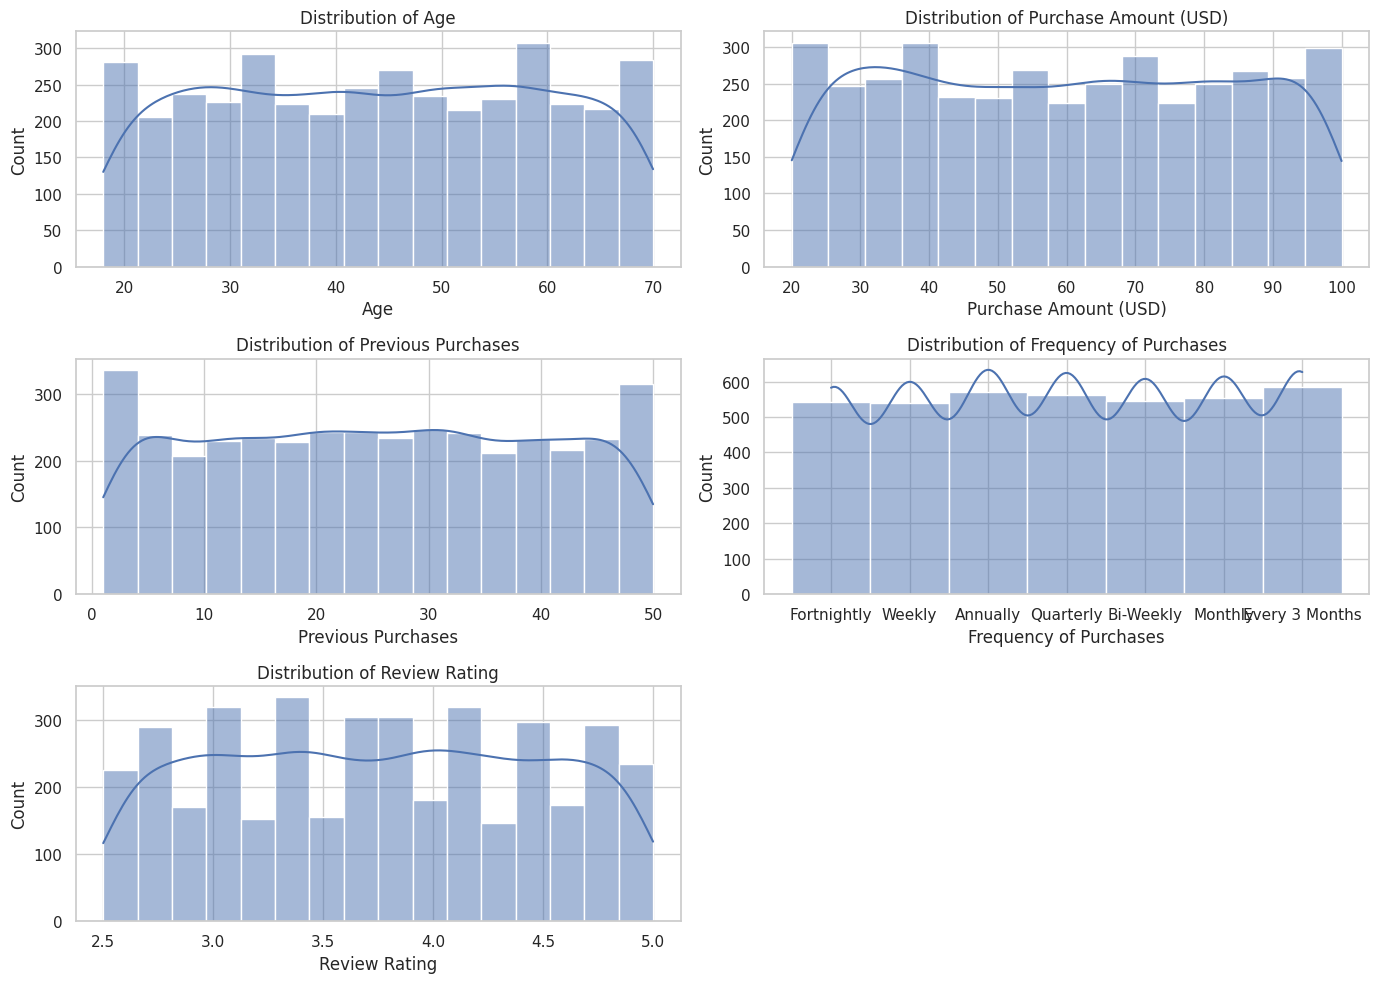

In [ ]:

sns.set(style="whitegrid")

# -------------------------
# 1. Distribution of Numeric Features
# -------------------------
numeric_cols = ["Age", "Purchase Amount (USD)", "Previous Purchases", "Frequency of Purchases", "Review Rating"]

plt.figure(figsize=(14,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

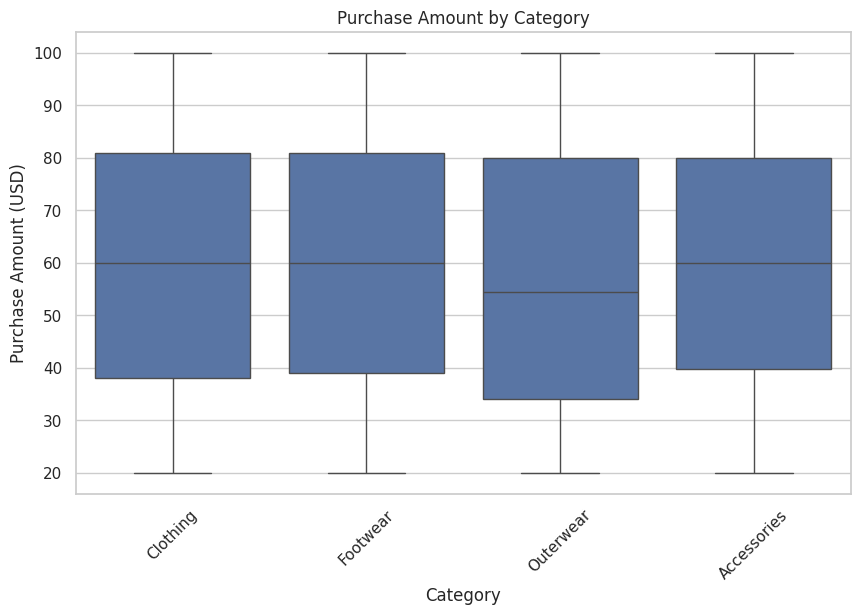

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Category", y="Purchase Amount (USD)", data=df)
plt.title("Purchase Amount by Category")
plt.xticks(rotation=45)
plt.show()

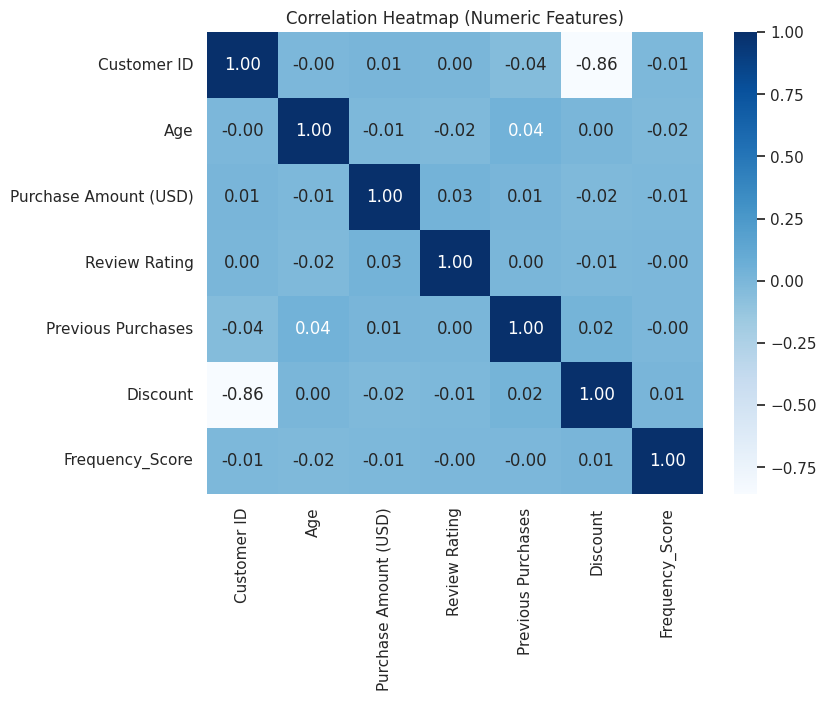

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Business recommendations and takeaway

1. Customers in the age group of 50-60 years have the highest purchase amount, whereas age group 20 - 30 and 70 - 80 years spends the least. Hence they should come up with offers that would attract people from other age group as well
2. Amongst all the customers male customers tend to spend more than female, one of the reasons could be the inventory is not up to date with latest trends or fashion in the market, thus attracting lesser female customers, updating the inventory might help to increase the number of female customers.
3. Almost 2/3 rd of the customer do not have subsciption, yet their average spending is same as the customers with subsciption suggesting that there is little or no special benefit that customer get from purchasing the subsciption.
4. Customers who purchase accessories and clothing tend to give a review, whereas very few customers purchasing footware and outware write a review, suggesting that the store sells good quality of accessories and clothing but footware and outware are not of the best quality.



# Conclusion


This EDA aimed at understanding the behaviour and shopping pattern of customers while shopping.

Analysis suggest that there is people in certain age group tend to spend more than other. Additionally there is difference in the spending habits between male and female customers. A large number of customers have not taken the subcription, indicating that the subsciption is not very useful for the customers.

This analysis gave an overview about the preferrences of the customers and their shopping habits. Further analysis like forecasting and predictive analysis can help to boost the sale.